## In this notebook, I will be diving in the top 1000 movies taken from IMDB (2021)

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing my dataset

imdb = pd.read_csv('imdb_top_1000.csv')

In [3]:
# Exploring my dataset

imdb.head

<bound method NDFrame.head of                                            Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3

In [4]:
imdb.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
imdb.duplicated().sum()

0

In [13]:
# Checking to see if there are any null values

imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [15]:
# Dropping the rows where there are nulls in the Gross and Meta_score columns

imdb = imdb.dropna(subset=['Gross', 'Meta_score'])

In [17]:
# Imputing null values in Certificate

imdb['Certificate'] = imdb['Certificate'].fillna('Unrated')

/var/folders/j4/zp2fvcv16r3_602nppyngwfc0000gn/T/ipykernel_75732/3098006766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['Certificate'] = imdb['Certificate'].fillna('Unrated')


In [19]:
# Checking to see if there are any null values

imdb.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## Question 1: What was the most popular type of genre for the top movies?

In [22]:
unique_genres = sorted(imdb['Genre'].unique().tolist())
print(unique_genres)

['Action, Adventure', 'Action, Adventure, Comedy', 'Action, Adventure, Drama', 'Action, Adventure, Family', 'Action, Adventure, Fantasy', 'Action, Adventure, History', 'Action, Adventure, Horror', 'Action, Adventure, Mystery', 'Action, Adventure, Romance', 'Action, Adventure, Sci-Fi', 'Action, Adventure, Thriller', 'Action, Adventure, War', 'Action, Adventure, Western', 'Action, Biography, Crime', 'Action, Biography, Drama', 'Action, Comedy, Crime', 'Action, Comedy, Fantasy', 'Action, Comedy, Mystery', 'Action, Crime, Drama', 'Action, Crime, Mystery', 'Action, Crime, Thriller', 'Action, Drama', 'Action, Drama, History', 'Action, Drama, Mystery', 'Action, Drama, Sci-Fi', 'Action, Drama, Sport', 'Action, Drama, War', 'Action, Drama, Western', 'Action, Mystery, Thriller', 'Action, Sci-Fi', 'Action, Sci-Fi, Thriller', 'Action, Thriller', 'Adventure, Biography, Crime', 'Adventure, Biography, Drama', 'Adventure, Comedy, Crime', 'Adventure, Comedy, Drama', 'Adventure, Comedy, Family', 'Advent

In [24]:
# Checking the count of my genres

imdb['Genre'].value_counts()

Genre
Drama                         66
Drama, Romance                27
Comedy, Drama                 27
Crime, Drama, Thriller        24
Action, Adventure, Sci-Fi     21
                              ..
Drama, Film-Noir, Romance      1
Action, Adventure, Romance     1
Drama, Family                  1
Crime, Drama, Sci-Fi           1
Comedy, Music, Musical         1
Name: count, Length: 175, dtype: int64

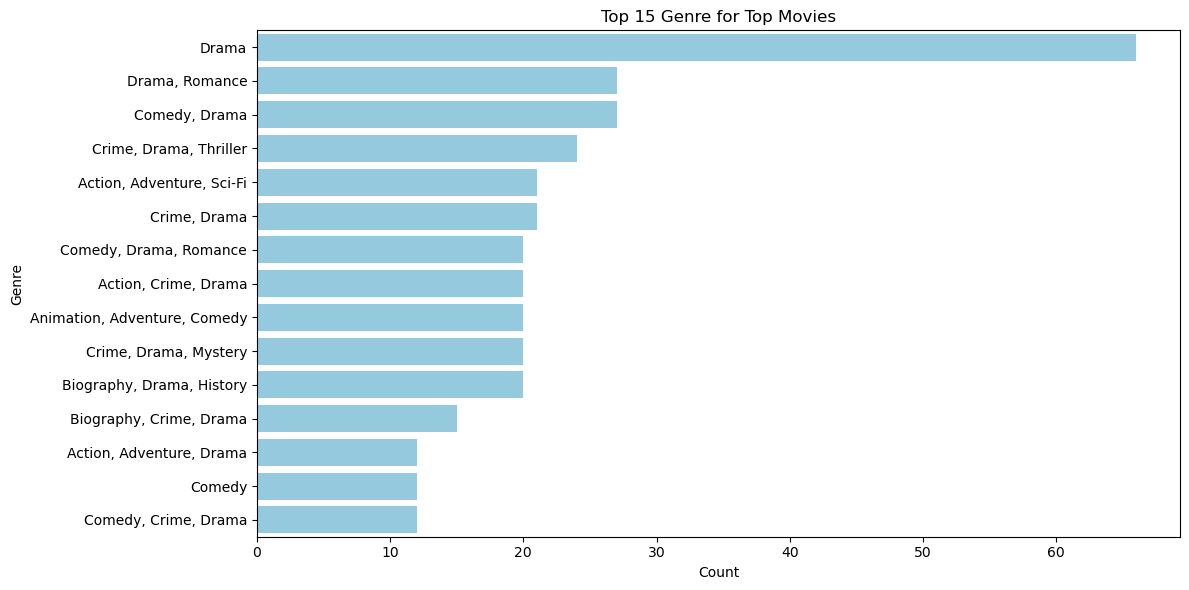

In [26]:
# Plotting a horizontal bar chart

plt.figure(figsize=(12, 6))
sns.countplot(
    y='Genre', 
    data=imdb,
    order=imdb['Genre'].value_counts().index[:15],
    color='skyblue'
)
plt.title('Top 15 Genre for Top Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### I see that Drama is the most popular genre for IMDB's top 1000 movies. 
### IMDB puts multiple genre parameters on movies and even then, you can see that Drama is part of the other categories.

## Question 2: Was there a director that made the most amount of the top movies?

In [29]:
unique_directors = imdb['Director'].unique()
print(unique_directors)

['Frank Darabont' 'Francis Ford Coppola' 'Christopher Nolan'
 'Sidney Lumet' 'Peter Jackson' 'Quentin Tarantino' 'Steven Spielberg'
 'David Fincher' 'Robert Zemeckis' 'Sergio Leone' 'Lana Wachowski'
 'Martin Scorsese' 'Irvin Kershner' 'Milos Forman' 'Bong Joon Ho'
 'Fernando Meirelles' 'Hayao Miyazaki' 'Roberto Benigni' 'Jonathan Demme'
 'George Lucas' 'Akira Kurosawa' 'Todd Phillips' 'Damien Chazelle'
 'Olivier Nakache' 'Roman Polanski' 'Ridley Scott' 'Tony Kaye'
 'Bryan Singer' 'Luc Besson' 'Roger Allers' 'James Cameron'
 'Giuseppe Tornatore' 'Alfred Hitchcock' 'Michael Curtiz'
 'Charles Chaplin' 'Nadine Labaki' 'Makoto Shinkai' 'Bob Persichetti'
 'Anthony Russo' 'Lee Unkrich' 'Rajkumar Hirani' 'Andrew Stanton'
 'Florian Henckel von Donnersmarck' 'Chan-wook Park' 'Stanley Kubrick'
 'Sam Mendes' 'Thomas Vinterberg' 'Asghar Farhadi' 'Denis Villeneuve'
 'Michel Gondry' 'Jean-Pierre Jeunet' 'Guy Ritchie' 'Darren Aronofsky'
 'Gus Van Sant' 'Majid Majidi' 'John Lasseter' 'Mel Gibson'
 'Bri

In [31]:
# Checking the count of my directors

imdb['Director'].value_counts()

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Clint Eastwood        8
                     ..
Neill Blomkamp        1
Tomas Alfredson       1
Duncan Jones          1
Jacques Audiard       1
Richard Lester        1
Name: count, Length: 426, dtype: int64

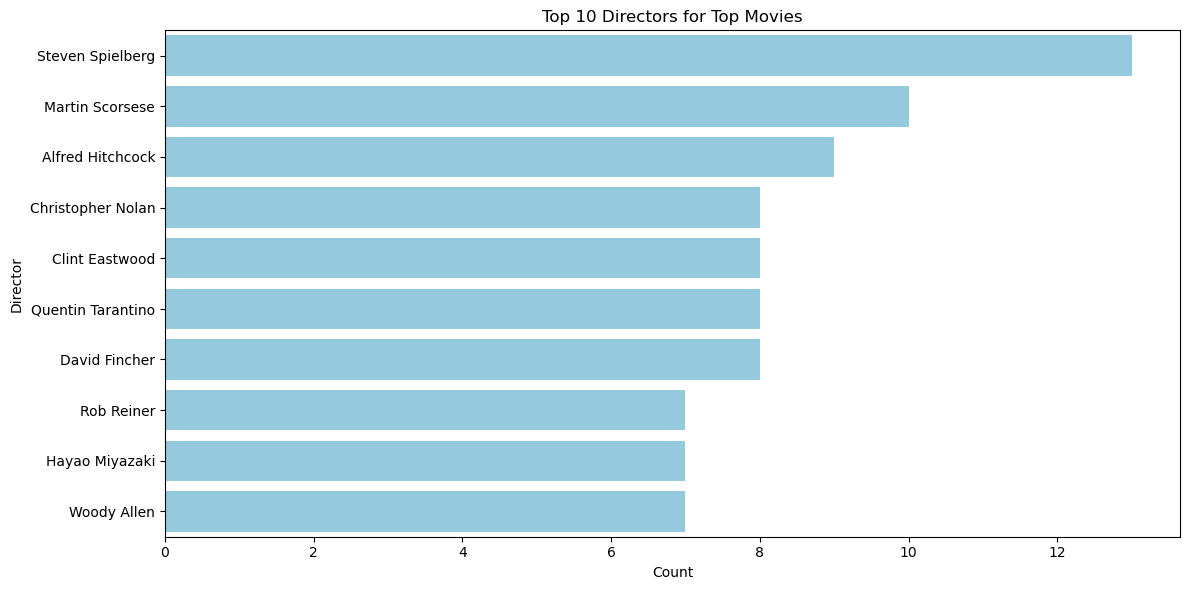

In [33]:
# Getting only the top 10 of the directors that showed up the most
top_10_directors = imdb['Director'].value_counts().nlargest(10).index

# Creating a horizontal bar chart
plt.figure(figsize=(12,6))
sns.countplot(
    y=imdb['Director'],
    data=imdb,
    order=top_10_directors,
    color='skyblue'
)

plt.title('Top 10 Directors for Top Movies')
plt.xlabel('Count')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

### Using a horizontal bar chart, I am visually displaying the most common directors that directed IMDB's top 1000 movies.
### You can see that Steven Speilberg is the top director that makes the most amount of highly rated movies.

## Question 3: Who is the star that appeared the most amount of times in the top 1000 movies?

In [36]:
# I have multiple star columns and am going to 'melt' them into one Series

star_columns = ['Star1', 'Star2', 'Star3', 'Star4']

m_stars = (imdb.melt(value_vars=star_columns, value_name='star')['star'].dropna())

In [38]:
star_counts = m_stars.value_counts()
print(star_counts)

star
Robert De Niro      16
Tom Hanks           14
Al Pacino           13
Brad Pitt           12
Christian Bale      11
                    ..
Jacques Villeret     1
Milla Jovovich       1
Jon Lovitz           1
Matt Stone           1
Donna Reed           1
Name: count, Length: 2030, dtype: int64


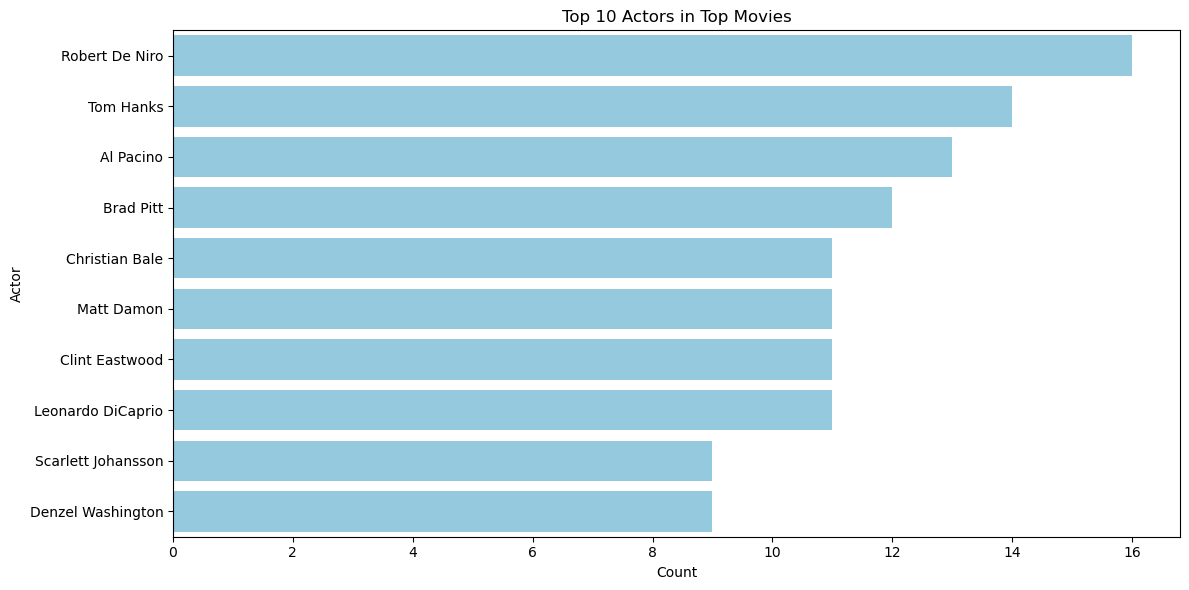

In [40]:
# Creating a horizontal bar chart

plt.figure(figsize=(12, 6))
sns.countplot(
    y='star',
    data=m_stars.to_frame(),
    order=star_counts.index[:10],
    color='skyblue'
)

plt.title('Top 10 Actors in Top Movies')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

### Movies can have multiple stars, in IMDB's case there were the top 4 stars of each movie in their list of 1000 top movies.
### Based on the above graph you can tell that the race for most occurring actor in the best movies are close.
### Robert De Niro has appeared in the most amount of the top 1000 movies with Tom Hanks and Al Pacino following right behind.

## Conclusion: